In [1]:
from google.colab import files
files.upload()

Saving samsung.csv to samsung.csv


{'samsung.csv': b'\xef\xbb\xbf\xec\x9d\xbc\xec\x9e\x90,\xec\x8b\x9c\xea\xb0\x80,\xea\xb3\xa0\xea\xb0\x80,\xec\xa0\x80\xea\xb0\x80,\xec\xa2\x85\xea\xb0\x80,\xea\xb1\xb0\xeb\x9e\x98\xeb\x9f\x89\r\n2020-09-03,"55,600","56,700","55,500","56,400","28,384,920"\r\n2020-09-02,"54,600","55,100","54,100","54,400","16,905,723"\r\n2020-09-01,"54,100","54,800","54,100","54,200","19,363,117"\r\n2020-08-31,"56,000","56,100","54,000","54,000","32,671,367"\r\n2020-08-28,"56,100","56,300","55,400","55,400","14,619,888"\r\n2020-08-27,"56,300","56,300","55,600","55,600","16,196,568"\r\n2020-08-26,"56,400","56,500","55,700","56,400","17,651,593"\r\n2020-08-25,"56,400","56,800","56,100","56,400","14,021,705"\r\n2020-08-24,"55,800","56,600","55,400","56,100","15,055,896"\r\n2020-08-21,"56,200","56,900","55,800","55,900","21,142,288"\r\n2020-08-20,"57,600","57,600","55,300","55,400","30,386,029"\r\n2020-08-19,"59,000","59,200","57,800","57,800","16,930,719"\r\n2020-08-18,"58,900","59,900","58,000","58,400","2

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('samsung.csv')

In [93]:
data.iloc[0:3]

,일자,시가,고가,저가,종가,거래량
0,2020-09-03,"55,600","56,700","55,500","56,400","28,384,920"
1,2020-09-02,"54,600","55,100","54,100","54,400","16,905,723"
2,2020-09-01,"54,100","54,800","54,100","54,200","19,363,117"


In [4]:
data.iloc[:575,1:6].isnull().sum()

시가     0
고가     0
저가     0
종가     0
거래량    0
dtype: int64

In [5]:
label = np.array(data.iloc[:575,4])

In [6]:
x_data = np.array(data.iloc[:575,1:6])

In [7]:
label.shape

(575,)

In [8]:
x_data.shape

(575, 5)

In [9]:
x_data = x_data[::-1]
label = label[::-1]

In [10]:
for i in x_data:
  for j in range(5):
    i[j]=int(i[j].replace(',',''))

print(x_data[0:5], x_data[-5:])
for i in range(len(label)):
  label[i]=int(label[i].replace(',',''))

print(label[0:5], label[-5:])

[[53000 53900 51800 51900 39565391]
 [52600 53200 51900 52600 23104720]
 [52600 52800 50900 50900 16128305]
 [51700 51700 50600 51600 13905263]
 [52000 52200 51200 51300 10314997]] [[56100 56300 55400 55400 14619888]
 [56000 56100 54000 54000 32671367]
 [54100 54800 54100 54200 19363117]
 [54600 55100 54100 54400 16905723]
 [55600 56700 55500 56400 28384920]]
[51900 52600 50900 51600 51300] [55400 54000 54200 54400 56400]


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler()
x_data = sc.fit_transform(x_data)

In [23]:
label = label/10000

In [24]:
x_data[0:5]

array([[0.63340122, 0.6468254 , 0.60160966, 0.57915832, 0.59505985],
       [0.61710794, 0.61904762, 0.6056338 , 0.60721443, 0.3164648 ],
       [0.61710794, 0.6031746 , 0.56539235, 0.53907816, 0.19838974],
       [0.58044807, 0.55952381, 0.55331992, 0.56713427, 0.160765  ],
       [0.59266802, 0.57936508, 0.57746479, 0.55511022, 0.10000014]])

In [25]:
x_train_dataset = x_data[:-100]
x_test_dataset = x_data[-100:]
y_train_dataset = label[:-100]
y_test_dataset = label[-100:]

print(x_train_dataset.shape, x_test_dataset.shape, y_train_dataset.shape, y_test_dataset.shape)

(475, 5) (100, 5) (475,) (100,)


In [76]:
# def slice_dataset(x,y,predict_date=7,period=20):
#   x_return = []
#   y_return = []
#   for i in range(len(x)-predict_date-period+1):
#     x_return.append(x[i:i+period])
#     y_return.append(y[i+period:i+period+predict_date])
#   return np.array(x_return), np.array(y_return)

In [106]:
def sd(x,y,period):
  x_return = []
  y_return = []
  x_last = []
  for i in range(len(x)-period):
    x_return.append(x[i:i+period])
    y_return.append(y[i+period])
  for i in range(len(x)-period+1):
    x_last.append(x[i:i+period])

  return np.array(x_return), np.array(y_return), np.array(x_last)

In [107]:
# predict_date = 1
# period = 40

# x_train, y_train = slice_dataset(x_train_dataset, y_train_dataset,
#                                  predict_date=predict_date,
#                                  period=period)

# x_test, y_test = slice_dataset(x_test_dataset, y_train_dataset,
#                                predict_date=predict_date,
#                                period=period)

x_train, y_train,_ = sd(x_train_dataset, y_train_dataset,30)

x_test, y_test, x_last = sd(x_test_dataset, y_test_dataset, 30)



print(x_train.shape,y_train.shape, x_test.shape, y_test.shape, x_last.shape)

(445, 30, 5) (445,) (70, 30, 5) (70,) (71, 30, 5)


In [111]:
print(x_last[-2:]-x_test[-1])

[[[ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          

In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [85]:
model = Sequential()
model.add(LSTM(64,input_shape=(30,5), return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 30, 64)            17920     
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 53,057
Trainable params: 53,057
Non-trainable params: 0
_________________________________________________

In [86]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('./best_model.h5', monitor='val_loss', mode='min',verbose=1, save_best_only=True)


model.compile(loss='mse',optimizer='adam')

model.fit(x_train, y_train, batch_size=10, epochs=500, validation_data=(x_test, y_test), callbacks=[es, mc])


model.load_weights('best_model.h5')

Epoch 1/500
39/45 [=========================>....] - ETA: 0s - loss: 5.5045
Epoch 00001: val_loss improved from inf to 0.77498, saving model to ./best_model.h5
45/45 [==============================] - 1s 19ms/step - loss: 4.9234 - val_loss: 0.7750
Epoch 2/500
41/45 [==========================>...] - ETA: 0s - loss: 0.8400
Epoch 00002: val_loss improved from 0.77498 to 0.16050, saving model to ./best_model.h5
45/45 [==============================] - 0s 7ms/step - loss: 0.8248 - val_loss: 0.1605
Epoch 3/500
40/45 [=========================>....] - ETA: 0s - loss: 0.7445
Epoch 00003: val_loss did not improve from 0.16050
45/45 [==============================] - 0s 6ms/step - loss: 0.7651 - val_loss: 0.2126
Epoch 4/500
39/45 [=========================>....] - ETA: 0s - loss: 0.7005
Epoch 00004: val_loss did not improve from 0.16050
45/45 [==============================] - 0s 6ms/step - loss: 0.6932 - val_loss: 0.2122
Epoch 5/500
40/45 [=========================>....] - ETA: 0s - loss: 0.64

In [89]:
pre = model.predict(x_test)

for i in range(len(pre)):
  print(f'{32+i}일 | 실제값 : {y_test[i]}만원  |  예측값 : {float(pre[i])}만원 |    차이 : {100 - float(pre[i])/y_test[i]*100}%')

32일 | 실제값 : 5.04만원  |  예측값 : 4.9962077140808105만원 |    차이 : 0.8688945618886805%
33일 | 실제값 : 5.07만원  |  예측값 : 5.121152400970459만원 |    차이 : -1.0089230960642794%
34일 | 실제값 : 5.12만원  |  예측값 : 5.068551063537598만원 |    차이 : 1.0048620402812958%
35일 | 실제값 : 5.14만원  |  예측값 : 5.1349711418151855만원 |    차이 : 0.09783770787575463%
36일 | 실제값 : 5.45만원  |  예측값 : 5.145522117614746만원 |    차이 : 5.586750135509249%
37일 | 실제값 : 5.46만원  |  예측값 : 5.4113922119140625만원 |    차이 : 0.890252529046478%
38일 | 실제값 : 5.55만원  |  예측값 : 5.561437129974365만원 |    차이 : -0.20607441395253545%
39일 | 실제값 : 5.49만원  |  예측값 : 5.475460052490234만원 |    차이 : 0.26484421693562865%
40일 | 실제값 : 5.55만원  |  예측값 : 5.5555925369262695만원 |    차이 : -0.10076643110394912%
41일 | 실제값 : 5.54만원  |  예측값 : 5.51834774017334만원 |    차이 : 0.39083501492166306%
42일 | 실제값 : 5.43만원  |  예측값 : 5.528339385986328만원 |    차이 : -1.811038415954485%
43일 | 실제값 : 5.23만원  |  예측값 : 5.409441947937012만원 |    차이 : -3.4310123888529915%
44일 | 실제값 : 4.99만원  |  예측값 : 5.19742441177

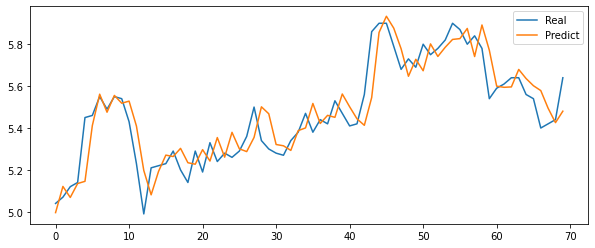

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='white', figsize=(10, 4))
ax = fig.add_subplot(111)
ax.plot(y_test, label='Real')
ax.plot(pre, label='Predict')
ax.legend()
plt.show()

In [138]:
print(f'내일의 종가 예측 : {float(model.predict(x_last)[-1])} 만원')

내일의 종가 예측 : 5.6682024002075195 만원
